In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.legend_handler import HandlerPathCollection 

# File to Load (Remember to change these)
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
merge_table = pd.merge(ride_data, city_data, on="city")
m = merge_table
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [13]:
# Obtain the x and y coordinates for Urban
urban = m['type'] == 'Urban'
urban_data = m[urban]

# group urban data by city
grouped_urban = urban_data.groupby(['city'])

# get variables for x and y coordinates
avg_fare_urban = grouped_urban['fare'].mean()
count_rides_urban = grouped_urban['fare'].count()
drivers_urban = grouped_urban['driver_count'].max() 

# summarize in new dataframe
summary_urban = pd.DataFrame({"Avg Fare": avg_fare_urban,
                              "Rides per City": count_rides_urban,
                              "Drivers per City": drivers_urban})

# extract lists to create graph
y_urban = summary_urban['Avg Fare'].tolist()
X_urban = summary_urban['Rides per City'].tolist()
z_urban = summary_urban['Drivers per City'].tolist()

z_urban = [i*10 for i in z_urban]

In [14]:
# Obtain the x and y coordinates for Suburban
suburban = m['type'] == 'Suburban'
suburban_data = m[suburban]

# group suburban data by city
grouped_suburban = suburban_data.groupby(['city'])

# get variables for x and y coordinates
avg_fare_suburban = grouped_suburban['fare'].mean()
count_rides_suburban = grouped_suburban['fare'].count()
drivers_suburban = grouped_suburban['driver_count'].max() 

# summarize in new dataframe
summary_suburban = pd.DataFrame({"Avg Fare": avg_fare_suburban,
                              "Rides per City": count_rides_suburban,
                              "Drivers per City": drivers_suburban})

# extract lists to create graph
y_suburban = summary_suburban['Avg Fare'].tolist()
X_suburban = summary_suburban['Rides per City'].tolist()
z_suburban = summary_suburban['Drivers per City'].tolist()

z_suburban = [i*10 for i in z_suburban]

In [15]:
# Obtain the x and y coordinates for Rural
rural = m['type'] == 'Rural'
rural_data = m[rural]

# group rural data by city
grouped_rural = rural_data.groupby(['city'])

# get variables for x and y coordinates
avg_fare_rural = grouped_rural['fare'].mean()
count_rides_rural = grouped_rural['fare'].count()
drivers_rural = grouped_rural['driver_count'].max() 

# summarize in new dataframe
summary_rural = pd.DataFrame({"Avg Fare": avg_fare_rural,
                              "Rides per City": count_rides_rural,
                              "Drivers per City": drivers_rural})

# extract lists to create graph
y_rural = summary_rural['Avg Fare'].tolist()
X_rural = summary_rural['Rides per City'].tolist()
z_rural = summary_rural['Drivers per City'].tolist()

z_rural = [i*10 for i in z_rural]

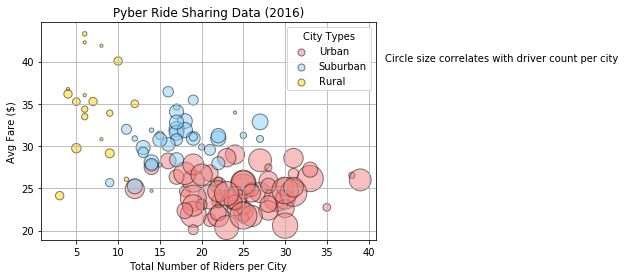

In [20]:
# build scatter plot
plt.scatter(X_urban, y_urban, s=z_urban, color='lightcoral', label='Urban', edgecolors= 'black', alpha = .5)
plt.scatter(X_suburban, y_suburban, s=z_suburban, color='lightskyblue', label='Suburban', edgecolors= 'black', alpha = .5)
plt.scatter(X_rural, y_rural, s=z_rural, color='gold', label='Rural', edgecolors= 'black', alpha = .5)

# scatter plot attributes
plt.grid()
plt.xlabel("Total Number of Riders per City")
plt.ylabel('Avg Fare ($)')
plt.text(42, 40, 'Circle size correlates with driver count per city')
plt.title('Pyber Ride Sharing Data (2016)')
plt.legend(loc='upper right', title='City Types')
lgnd = plt.legend(loc='upper right', title='City Types')

# change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.show()

## Total Fares by City Type

In [79]:
# Calculate Type Percents
grouped_type_fare = m.groupby(['type'])

#group the data by type
types_fare = grouped_type_fare['fare'].sum()

#create a dataframe
types_fare_df = pd.DataFrame({"Total Fares": types_fare})

#get list of values for pie chart
types_fare_list = types_fare_df['Total Fares'].tolist()

#get pie chart attributes
labels = ('Rural','Suburban','Urban')
colors = ('gold', 'lightskyblue', 'lightcoral')
explode = (0, 0, 0.3)

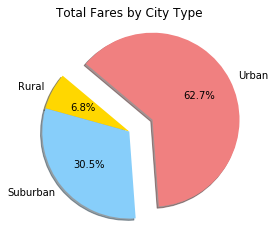

In [80]:
#Build chart
pie = plt.pie(types_fare_list, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Add a title
plt.title('Total Fares by City Type')

#Save chart
plt.savefig('C:\\Users\\jhalek\\Desktop\\cwrubootcamp\\CWCL201901DATA4\\05-Matplotlib\\Homework\\Instructions\\Pyber\\Total_Fares_by_City_Type.pdf')

#Show chart
plt.show()



## Total Rides by City Type

In [81]:
# Calculate Type Percents
grouped_type_riders = m.groupby(['type'])

#group the data by type
types_rider = grouped_type_riders['fare'].count()

#create a dataframe
types_rider_df = pd.DataFrame({"Total Ride Counts": types_rider})

#get list of values for pie chart
types_rider_list = types_rider_df['Total Ride Counts'].tolist()

#get pie chart attributes
labels = ('Rural','Suburban','Urban')
colors = ('gold', 'lightskyblue', 'lightcoral')
explode = (0, 0, 0.3)

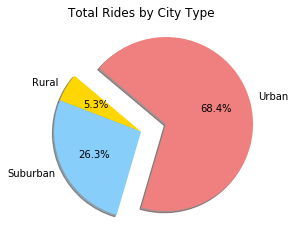

In [82]:
#Build chart
pie = plt.pie(types_rider_list, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Add a title
plt.title('Total Rides by City Type')

#Save chart
plt.savefig('C:\\Users\\jhalek\\Desktop\\cwrubootcamp\\CWCL201901DATA4\\05-Matplotlib\\Homework\\Instructions\\Pyber\\Total_Rides_by_City_Type.pdf')

#Show chart
plt.show()



## Total Drivers by City Type

In [83]:
clean_driver = m

# drop irrellevant columns and remove duplicates
clean_driver = clean_driver.drop(['date', 'fare', 'ride_id'], axis=1)
clean_driver = clean_driver.drop_duplicates(subset=['city', 'driver_count', 'type'], keep='first')
clean_driver = clean_driver.drop(['city'], axis=1)
clean_driver = clean_driver.reset_index(drop=True)

In [84]:
# group the data by type
clean_driver_grouped = clean_driver.groupby(['type'])

# get attributes for new dataframe
types_driver = clean_driver_grouped['driver_count'].sum()

# create a dataframe
types_driver_df = pd.DataFrame({"Total Driver Counts": types_driver})

In [85]:
#get list of values for pie chart
types_driver_list = types_driver_df['Total Driver Counts'].tolist()

#get pie chart attributes
labels = ('Rural','Suburban','Urban')
colors = ('gold', 'lightskyblue', 'lightcoral')
explode = (0, 0, 0.3)

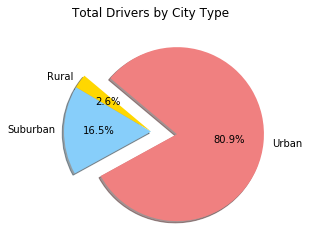

In [86]:
#Build chart
pie = plt.pie(types_driver_list, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Add a title
plt.title('Total Drivers by City Type')

#Save chart
plt.savefig('C:\\Users\\jhalek\\Desktop\\cwrubootcamp\\CWCL201901DATA4\\05-Matplotlib\\Homework\\Instructions\\Pyber\\Total_Drivers_by_City_Type.pdf')

#Show chart
plt.show()
